# Feature Preparation, Selection and Engineering

In [91]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import minmax_scale
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import RFECV

### Exploring the Data

In [2]:
train = pd.read_csv('train.csv')
holdout = pd.read_csv('test.csv')

In [3]:
train.shape

(891, 12)

In [4]:
holdout.shape

(418, 11)

In [5]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
holdout.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


### Preparing initially selected columns for Machine Learning

In [7]:
def process_age(df):
    df["Age"] = df["Age"].fillna(-0.5)
    cut_points = [-1,0,5,12,18,35,60,100]
    label_names = ["Missing","Infant","Child","Teenager","Young Adult","Adult","Senior"]
    df["Age_categories"] = pd.cut(df["Age"],cut_points,labels=label_names)
    return df

In [8]:
def create_dummies(df,column_name):
    dummies = pd.get_dummies(df[column_name],prefix=column_name)
    df = pd.concat([df,dummies],axis=1)
    return df

In [9]:
train = process_age(train)
holdout = process_age(holdout)

In [10]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_categories
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Young Adult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Young Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Young Adult
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Young Adult


In [11]:
holdout.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_categories
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,Young Adult
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,Adult
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,Senior
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,Young Adult
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,Young Adult


In [12]:
cols = ["Age_categories","Pclass", "Sex"]

In [13]:
for col in cols:
    train = create_dummies(train,col)
    holdout = create_dummies(holdout,col)

In [14]:
train.shape

(891, 25)

In [15]:
holdout.shape

(418, 24)

In [16]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Age_categories_Child,Age_categories_Teenager,Age_categories_Young Adult,Age_categories_Adult,Age_categories_Senior,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,0,0,1,0,0,0,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,0,0,0,1,0,1,0,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,0,0,1,0,0,0,0,1,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,0,0,1,0,0,1,0,0,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,0,0,1,0,0,0,0,1,0,1


In [17]:
holdout.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,...,Age_categories_Child,Age_categories_Teenager,Age_categories_Young Adult,Age_categories_Adult,Age_categories_Senior,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,...,0,0,1,0,0,0,0,1,0,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,...,0,0,0,1,0,0,0,1,1,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,...,0,0,0,0,1,0,1,0,0,1
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,...,0,0,1,0,0,0,0,1,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,...,0,0,1,0,0,0,0,1,1,0


### Selecting and processing additional features

In [18]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Age_categories',
       'Age_categories_Missing', 'Age_categories_Infant',
       'Age_categories_Child', 'Age_categories_Teenager',
       'Age_categories_Young Adult', 'Age_categories_Adult',
       'Age_categories_Senior', 'Pclass_1', 'Pclass_2', 'Pclass_3',
       'Sex_female', 'Sex_male'],
      dtype='object')

In [19]:
additional_cols = ['SibSp', 'Parch', 'Fare', 'Cabin', 'Embarked']

In [20]:
train[additional_cols].describe(include = 'all', percentiles = [])

,SibSp,Parch,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,204,889
unique,NaN,NaN,NaN,147,3
top,NaN,NaN,NaN,G6,S
freq,NaN,NaN,NaN,4,644
mean,0.523008,0.381594,32.204208,NaN,NaN
std,1.102743,0.806057,49.693429,NaN,NaN
min,0.000000,0.000000,0.000000,NaN,NaN
50%,0.000000,0.000000,14.454200,NaN,NaN
max,8.000000,6.000000,512.329200,NaN,NaN


In [22]:
holdout["Fare"] = holdout["Fare"].fillna(train["Fare"].mean())

In [23]:
train["Embarked"] = train["Embarked"].fillna("S")

In [24]:
holdout["Embarked"] = holdout["Embarked"].fillna("S")

In [25]:
import warnings
warnings.filterwarnings('ignore')

In [26]:
train = create_dummies(train,"Embarked")
holdout = create_dummies(holdout,"Embarked")

In [27]:
train["SibSp_scaled"] = minmax_scale(train["SibSp"])
holdout["SibSp_scaled"] = minmax_scale(holdout["SibSp"])

In [28]:
train["Parch_scaled"] = minmax_scale(train["Parch"])
holdout["Parch_scaled"] = minmax_scale(holdout["Parch"])

In [29]:
train["Fare_scaled"] = minmax_scale(train["Fare"])
holdout["Fare_scaled"] = minmax_scale(holdout["Fare"])

In [30]:
train.shape

(891, 31)

In [31]:
holdout.shape

(418, 30)

In [32]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,SibSp_scaled,Parch_scaled,Fare_scaled
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,0,1,0,1,0,0,1,0.125,0.0,0.014151
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,0,0,1,0,1,0,0,0.125,0.0,0.139136
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,0,1,1,0,0,0,1,0.000,0.0,0.015469
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,0,0,1,0,0,0,1,0.125,0.0,0.103644
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,0,1,0,1,0,0,1,0.000,0.0,0.015713


In [33]:
holdout.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,...,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,SibSp_scaled,Parch_scaled,Fare_scaled
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,...,0,1,0,1,0,1,0,0.000,0.000000,0.015282
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,...,0,1,1,0,0,0,1,0.125,0.000000,0.013663
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,...,1,0,0,1,0,1,0,0.000,0.000000,0.018909
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,...,0,1,0,1,0,0,1,0.000,0.000000,0.016908
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,...,0,1,1,0,0,0,1,0.125,0.111111,0.023984


### Finding the most relevant features

In [35]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Age_categories',
       'Age_categories_Missing', 'Age_categories_Infant',
       'Age_categories_Child', 'Age_categories_Teenager',
       'Age_categories_Young Adult', 'Age_categories_Adult',
       'Age_categories_Senior', 'Pclass_1', 'Pclass_2', 'Pclass_3',
       'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S',
       'SibSp_scaled', 'Parch_scaled', 'Fare_scaled'],
      dtype='object')

In [36]:
columns = ['Age_categories_Missing', 'Age_categories_Infant','Age_categories_Child', 'Age_categories_Teenager',
           'Age_categories_Young Adult', 'Age_categories_Adult','Age_categories_Senior', 'Pclass_1', 'Pclass_2',
           'Pclass_3','Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S','SibSp_scaled',
           'Parch_scaled', 'Fare_scaled']

In [37]:
lr = LogisticRegression()
lr.fit(train[columns],train['Survived'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [39]:
coefficients = lr.coef_
coefficients

array([[-0.34723567,  1.86060592,  0.34493188, -0.18273418, -0.0110893 ,
        -0.52620202, -0.90049959,  1.04515623,  0.13729476, -0.94467395,
         1.45610934, -1.2183323 ,  0.25010253,  0.24374319, -0.25606868,
        -1.74775712, -0.77650208,  0.54308487]])

In [40]:
feature_importance = pd.Series(coefficients[0], index=columns)
feature_importance

Age_categories_Missing       -0.347236
Age_categories_Infant         1.860606
Age_categories_Child          0.344932
Age_categories_Teenager      -0.182734
Age_categories_Young Adult   -0.011089
Age_categories_Adult         -0.526202
Age_categories_Senior        -0.900500
Pclass_1                      1.045156
Pclass_2                      0.137295
Pclass_3                     -0.944674
Sex_female                    1.456109
Sex_male                     -1.218332
Embarked_C                    0.250103
Embarked_Q                    0.243743
Embarked_S                   -0.256069
SibSp_scaled                 -1.747757
Parch_scaled                 -0.776502
Fare_scaled                   0.543085
dtype: float64

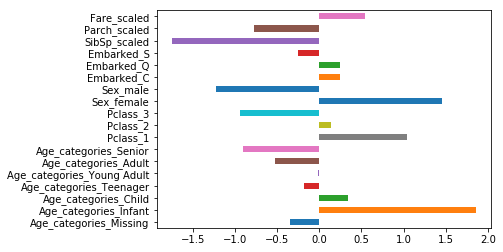

In [42]:
feature_importance.plot.barh()
plt.show()

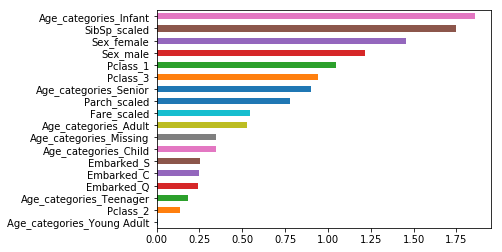

In [43]:
ordered_feature_importance = feature_importance.abs().sort_values()
ordered_feature_importance.plot.barh()
plt.show()

### Training a new model using top 8 features

In [45]:
top_features = ['Age_categories_Infant', 'SibSp_scaled', 'Sex_female', 'Sex_male',
                'Pclass_1', 'Pclass_3', 'Age_categories_Senior', 'Parch_scaled']

In [46]:
lr = LogisticRegression()

In [47]:
scores = cross_val_score(lr,train[columns],train['Survived'], cv=10)
accuracy = scores.mean()
accuracy

0.81483997276132114

### Submitting the improved model to Kaggle

In [48]:
all_X = train[columns]
all_y = train['Survived']

In [49]:
lr = LogisticRegression()
lr.fit(all_X,all_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [50]:
predictions = lr.predict(holdout[columns])

In [51]:
submission = pd.DataFrame({"PassengerId": holdout["PassengerId"], "Survived": predictions})
submission.to_csv("submission_1.csv", index = False)

### Feature Engineering by Binning

In [52]:
def process_age(df,cut_points,label_names):
    df["Age"] = df["Age"].fillna(-0.5)
    df["Age_categories"] = pd.cut(df["Age"],cut_points,labels=label_names)
    return df

In [53]:
def process_fare(df,cut_points,label_names):
    df["Fare_categories"] = pd.cut(df["Fare"],cut_points,labels=label_names)
    return df

In [54]:
cutting_points = [0,12,50,100,1000]
labels = ["0-12","12-50","50-100","100+"]

In [55]:
train = process_fare(train,cutting_points,labels)
holdout = process_fare(holdout,cutting_points,labels)

In [56]:
train = create_dummies(train,"Fare_categories")
holdout = create_dummies(holdout,"Fare_categories")

In [57]:
train.shape

(891, 36)

In [58]:
holdout.shape

(418, 35)

### Feature Engineering by extracting data from text columns

In [59]:
titles = {
    "Mr" :         "Mr",
    "Mme":         "Mrs",
    "Ms":          "Mrs",
    "Mrs" :        "Mrs",
    "Master" :     "Master",
    "Mlle":        "Miss",
    "Miss" :       "Miss",
    "Capt":        "Officer",
    "Col":         "Officer",
    "Major":       "Officer",
    "Dr":          "Officer",
    "Rev":         "Officer",
    "Jonkheer":    "Royalty",
    "Don":         "Royalty",
    "Sir" :        "Royalty",
    "Countess":    "Royalty",
    "Dona":        "Royalty",
    "Lady" :       "Royalty"
}

In [62]:
train["Title"] = train["Name"].str.extract(' ([A-Za-z]+)\.',expand=False).map(titles)
train["Title"].head(10)

0        Mr
1       Mrs
2      Miss
3       Mrs
4        Mr
5        Mr
6        Mr
7    Master
8       Mrs
9       Mrs
Name: Title, dtype: object

In [63]:
holdout["Title"] = holdout["Name"].str.extract(' ([A-Za-z]+)\.',expand=False).map(titles)
holdout["Title"].head(10)

0      Mr
1     Mrs
2      Mr
3      Mr
4     Mrs
5      Mr
6    Miss
7      Mr
8     Mrs
9      Mr
Name: Title, dtype: object

In [69]:
train["Cabin_type"] = train["Cabin"].str[0]
train["Cabin_type"] = train["Cabin_type"].fillna("Unknown")
train["Cabin_type"].head(20)

0     Unknown
1           C
2     Unknown
3           C
4     Unknown
5     Unknown
6           E
7     Unknown
8     Unknown
9     Unknown
10          G
11          C
12    Unknown
13    Unknown
14    Unknown
15    Unknown
16    Unknown
17    Unknown
18    Unknown
19    Unknown
Name: Cabin_type, dtype: object

In [68]:
holdout["Cabin_type"] = holdout["Cabin"].str[0]
holdout["Cabin_type"] = holdout["Cabin_type"].fillna("Unknown")
holdout["Cabin_type"].head(20)

0     Unknown
1     Unknown
2     Unknown
3     Unknown
4     Unknown
5     Unknown
6     Unknown
7     Unknown
8     Unknown
9     Unknown
10    Unknown
11    Unknown
12          B
13    Unknown
14          E
15    Unknown
16    Unknown
17    Unknown
18    Unknown
19    Unknown
Name: Cabin_type, dtype: object

In [70]:
train = create_dummies(train,"Title")
holdout = create_dummies(holdout,"Title")

In [71]:
train = create_dummies(train,"Cabin_type")
holdout = create_dummies(holdout,"Cabin_type")

In [72]:
train.shape

(891, 53)

In [73]:
holdout.shape

(418, 51)

### Colinearity

In [75]:
correlations = train.corr()

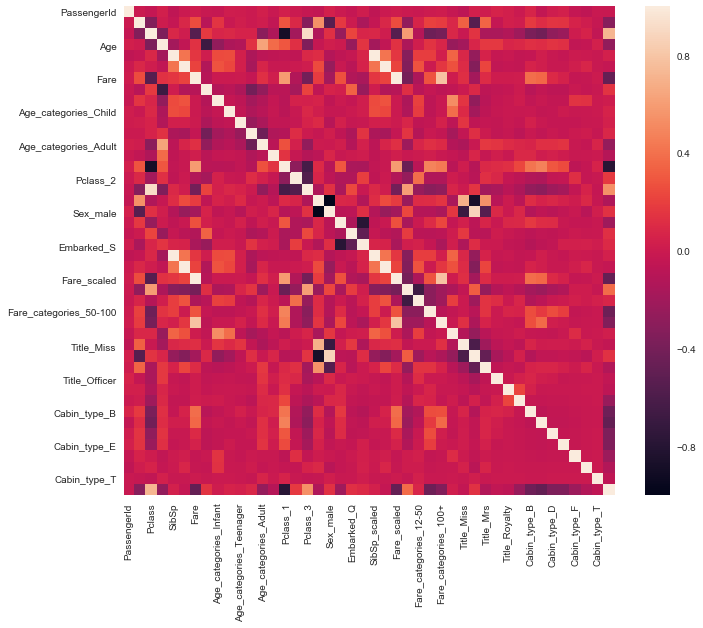

In [90]:
sns.heatmap(correlations)
fig = plt.gcf()
fig.set_size_inches(11, 9)
plt.show()

In [86]:
def plot_correlation_heatmap(df):
    corr = df.corr()
    
    sns.set(style="white")
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    f, ax = plt.subplots(figsize=(11, 9))
    cmap = sns.diverging_palette(220, 10, as_cmap=True)


    sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.2, cbar_kws={"shrink": .2})
    plt.show()

In [87]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Age_categories',
       'Age_categories_Missing', 'Age_categories_Infant',
       'Age_categories_Child', 'Age_categories_Teenager',
       'Age_categories_Young Adult', 'Age_categories_Adult',
       'Age_categories_Senior', 'Pclass_1', 'Pclass_2', 'Pclass_3',
       'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S',
       'SibSp_scaled', 'Parch_scaled', 'Fare_scaled', 'Fare_categories',
       'Fare_categories_0-12', 'Fare_categories_12-50',
       'Fare_categories_50-100', 'Fare_categories_100+', 'Title', 'Cabin_type',
       'Title_Master', 'Title_Miss', 'Title_Mr', 'Title_Mrs', 'Title_Officer',
       'Title_Royalty', 'Cabin_type_A', 'Cabin_type_B', 'Cabin_type_C',
       'Cabin_type_D', 'Cabin_type_E', 'Cabin_type_F', 'Cabin_type_G',
       'Cabin_type_T', 'Cabin_type_Unknown'],
      dtype='object')

In [88]:
columns = ['Age_categories_Missing', 'Age_categories_Infant','Age_categories_Child', 'Age_categories_Teenager',
           'Age_categories_Young Adult', 'Age_categories_Adult',
           'Age_categories_Senior', 'Pclass_1', 'Pclass_2', 'Pclass_3',
           'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S',
           'SibSp_scaled', 'Parch_scaled', 'Fare_scaled', 'Fare_categories',
           'Fare_categories_0-12', 'Fare_categories_12-50',
           'Fare_categories_50-100', 'Fare_categories_100+', 'Title', 'Cabin_type',
           'Title_Master', 'Title_Miss', 'Title_Mr', 'Title_Mrs', 'Title_Officer',
           'Title_Royalty', 'Cabin_type_A', 'Cabin_type_B', 'Cabin_type_C',
           'Cabin_type_D', 'Cabin_type_E', 'Cabin_type_F', 'Cabin_type_G',
           'Cabin_type_T', 'Cabin_type_Unknown']

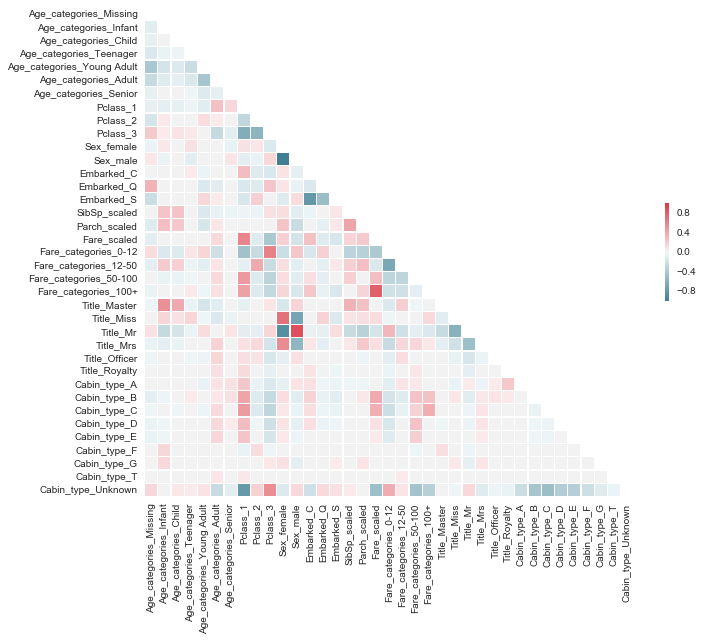

In [89]:
plot_correlation_heatmap(train[columns])

### Feature selection using RFECV

In [92]:
columns = ['Age_categories_Missing', 'Age_categories_Infant',
       'Age_categories_Child', 'Age_categories_Young Adult',
       'Age_categories_Adult', 'Age_categories_Senior', 'Pclass_1', 'Pclass_3',
       'Embarked_C', 'Embarked_Q', 'Embarked_S', 'SibSp_scaled',
       'Parch_scaled', 'Fare_categories_0-12', 'Fare_categories_50-100',
       'Fare_categories_100+', 'Title_Miss', 'Title_Mr', 'Title_Mrs',
       'Title_Officer', 'Title_Royalty', 'Cabin_type_B', 'Cabin_type_C',
       'Cabin_type_D', 'Cabin_type_E', 'Cabin_type_F', 'Cabin_type_G',
       'Cabin_type_T', 'Cabin_type_Unknown']

In [93]:
all_X = train[columns]
all_y = train["Survived"]

In [94]:
lr = LogisticRegression()

In [95]:
selector = RFECV(lr,cv=10)
selector.fit(all_X,all_y)

RFECV(cv=10,
   estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
   n_jobs=1, scoring=None, step=1, verbose=0)

In [97]:
optimized_columns = all_X.columns[selector.support_]
optimized_columns 

Index(['SibSp_scaled', 'Title_Mr', 'Title_Officer', 'Cabin_type_Unknown'], dtype='object')

### Training a new model using the optimized columns

In [98]:
optimized_cols = ['SibSp_scaled', 'Title_Mr', 'Title_Officer', 'Cabin_type_Unknown']

In [99]:
all_X = train[optimized_cols]
all_y = train["Survived"]

In [100]:
lr = LogisticRegression()
scores = cross_val_score(lr,all_X,all_y,cv=10)
scores

array([ 0.83333333,  0.83333333,  0.7752809 ,  0.87640449,  0.83146067,
        0.80898876,  0.80898876,  0.78651685,  0.84269663,  0.82954545])

In [101]:
accuracy = scores.mean()
accuracy

0.82265491998638074